# Is the future customer churn predictable by analysing data from the past?

Analysis of IBM Watson Analytic customer telecommunications data to determine why customers are churning and develop and test some models to identify and predict at-risk customers.


In [2]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn import tree
from sklearn import ensemble
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score 
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

# Data Exploration & Visualization

For purpose of building various models in order to predict whether a customer will drop telecommunications services (churn) or maintain those services based on various demographic and service specific data, in this notebook the Telecom Customer Churn dataset from the Kaggle website (https://www.kaggle.com/dheerajetx/telecom#WA_Fn-UseC_-Telco-Customer-Churn.xlsx) will be used.

In [3]:
# Getting the data
pd.set_option('display.max_columns', None)
df = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check for null values
display(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [4]:
# Convert TotalCharges to numeric
df['TotalCharges'] = df.TotalCharges.convert_objects(convert_numeric=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [177]:
display(df.isnull().any())

is_male                      False
SeniorCitizen                False
Partner                      False
Dependents                   False
tenure                       False
PhoneService                 False
MultipleLines                False
OnlineSecurity               False
OnlineBackup                 False
DeviceProtection             False
TechSupport                  False
StreamingTV                  False
StreamingMovies              False
PaperlessBilling             False
MonthlyCharges               False
TotalCharges                  True
Churn                        False
DSL                          False
Fiber optic                  False
NoInt_service                False
Month-to-month               False
One year                     False
Two year                     False
Bank transfer (automatic)    False
Credit card (automatic)      False
Electronic check             False
Mailed check                 False
dtype: bool

In [5]:
df['TotalCharges'].loc[df['TotalCharges'].isnull()] = 0
display(df['TotalCharges'].isnull().any())

False

In [6]:
numeric = df.select_dtypes(['int64','float64']).columns
categoric =  df.select_dtypes(['object']).columns

### Graphs of the Numeric Variables:

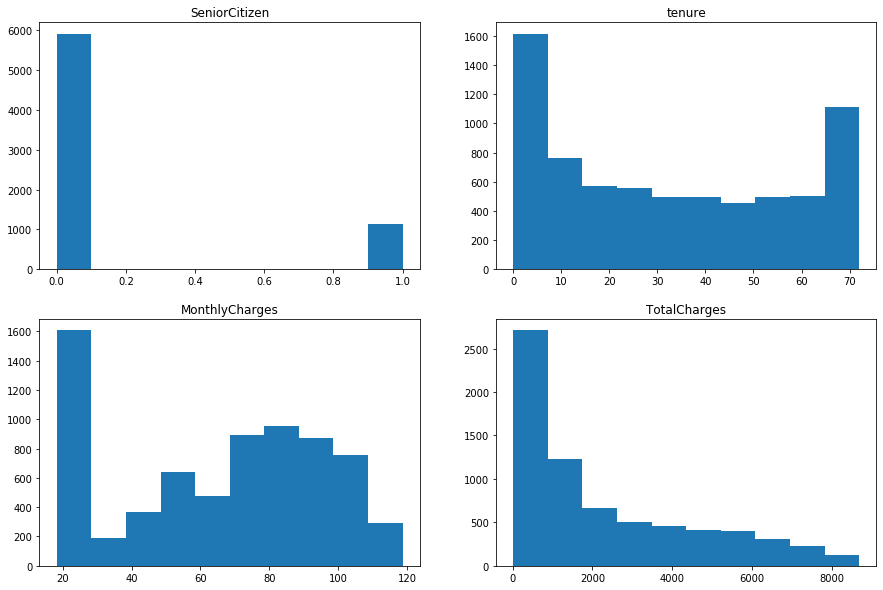

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col])
    plt.title(col)

### Graphs of the Categorical Variables:

In [7]:
categoric = categoric.drop('customerID')

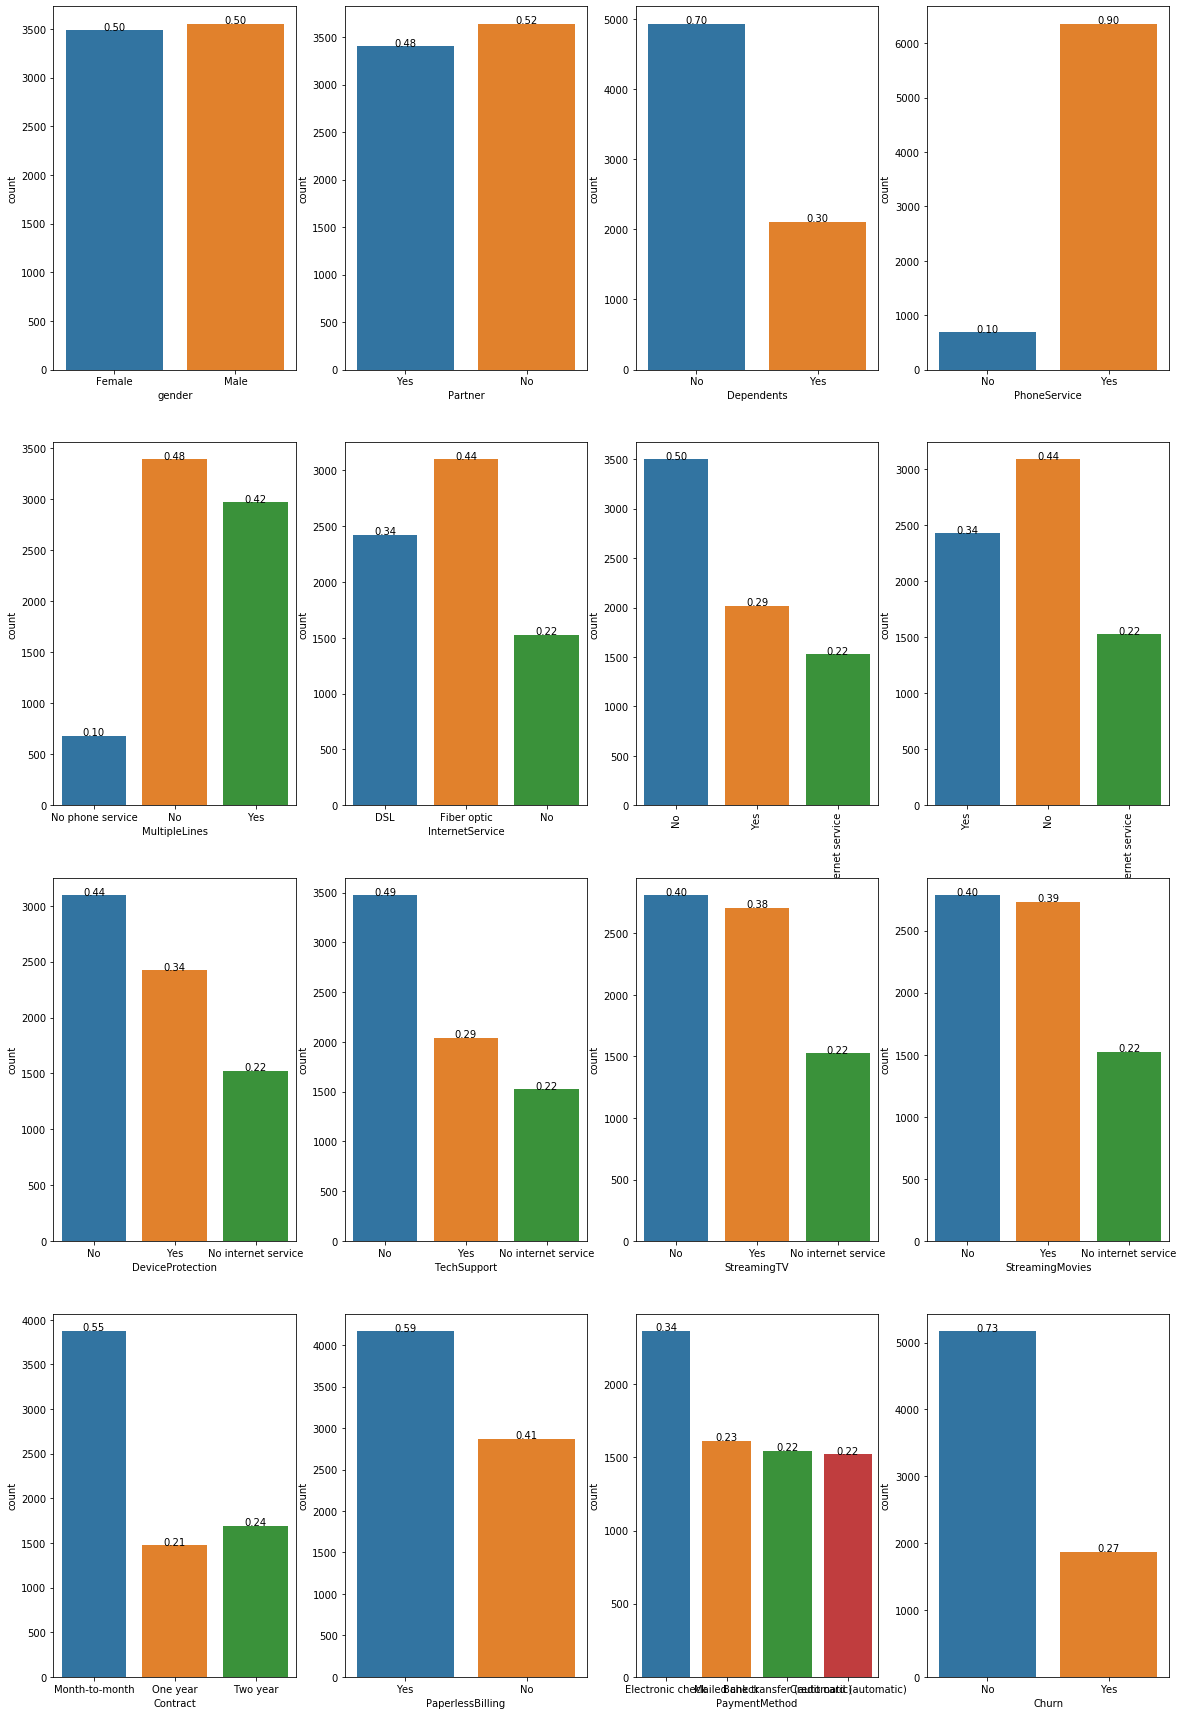

In [35]:
total_records= len(df)
plt.figure(figsize=(20,8))
j=0
for i in categoric:
    j +=1
    plt.subplot(4,4,j)
    ax1 = sns.countplot(data=df,x= i)
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

By now we have seen that the data in dataset was almost clean, and except for a few number of records there were no missing values. Now we need to convert categorical variables to numeric, and for this we are changing Yes/NO and Male/Female values to 0/1 and for other categorical values we create dummy variables:  

In [8]:
# Convert 'yes/no' values to '1/0' 
# & also 'no internet/phone service' values to '0' (since 'no internet/phone service' is the same as 'no')
yn_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for variable,i in enumerate(yn_columns):
    #print(yn[yn_columns[variable]].values)
    df[yn_columns[variable]] = np.where(df[yn_columns[variable]].values == 'Yes', 1, 0)

In [9]:
# Convert male/female to 1/0 and gender column name
df = df.rename(columns = {'gender':'is_male'})
df['is_male'].replace(('Female', 'Male'), (0, 1), inplace=True)

In [129]:
df.head()

,customerID,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
# Dummy variables for vategorical values in gender, Contract, and PaymentMethod
dummy = pd.get_dummies(df['InternetService'])
df = df.merge(dummy, left_index=True, right_index=True)

df = df.drop(['InternetService'], axis=1)

df = df.rename(columns = {'No':'NoInt_service'})

dummy = pd.get_dummies(df['Contract'])
df = df.merge(dummy, left_index=True, right_index=True)

df = df.drop(['Contract'], axis=1)

dummy = pd.get_dummies(df['PaymentMethod'])
df = df.merge(dummy, left_index=True, right_index=True)

df = df.drop(['PaymentMethod'], axis=1)

In [150]:
df.head()

,customerID,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInt_service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [153]:
# Checking data types.
df.dtypes

customerID                    object
is_male                        int64
SeniorCitizen                  int64
Partner                        int32
Dependents                     int32
tenure                         int64
PhoneService                   int32
MultipleLines                  int32
OnlineSecurity                 int32
OnlineBackup                   int32
DeviceProtection               int32
TechSupport                    int32
StreamingTV                    int32
StreamingMovies                int32
PaperlessBilling               int32
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int32
DSL                            uint8
Fiber optic                    uint8
NoInt_service                  uint8
Month-to-month                 uint8
One year                       uint8
Two year                       uint8
Bank transfer (automatic)      uint8
Credit card (automatic)        uint8
Electronic check               uint8
M

Because data science models work just with numeric values, we need to change our dummy variables type from unit8 to a numeric type. We are converting type unit8 to int32, and because the variable customerID does not contain an effective information for our analysis, we will drop it.

In [11]:
# Change dtypes from 'uint8' to 'int32'.
cols = ['DSL', 'Fiber optic', 'NoInt_service', 'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)',
        'Credit card (automatic)', 'Electronic check', 'Mailed check']
for col in cols:
    df[col] = df[col].astype('int32')

df.dtypes

customerID                    object
is_male                        int64
SeniorCitizen                  int64
Partner                        int32
Dependents                     int32
tenure                         int64
PhoneService                   int32
MultipleLines                  int32
OnlineSecurity                 int32
OnlineBackup                   int32
DeviceProtection               int32
TechSupport                    int32
StreamingTV                    int32
StreamingMovies                int32
PaperlessBilling               int32
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int32
DSL                            int32
Fiber optic                    int32
NoInt_service                  int32
Month-to-month                 int32
One year                       int32
Two year                       int32
Bank transfer (automatic)      int32
Credit card (automatic)        int32
Electronic check               int32
M

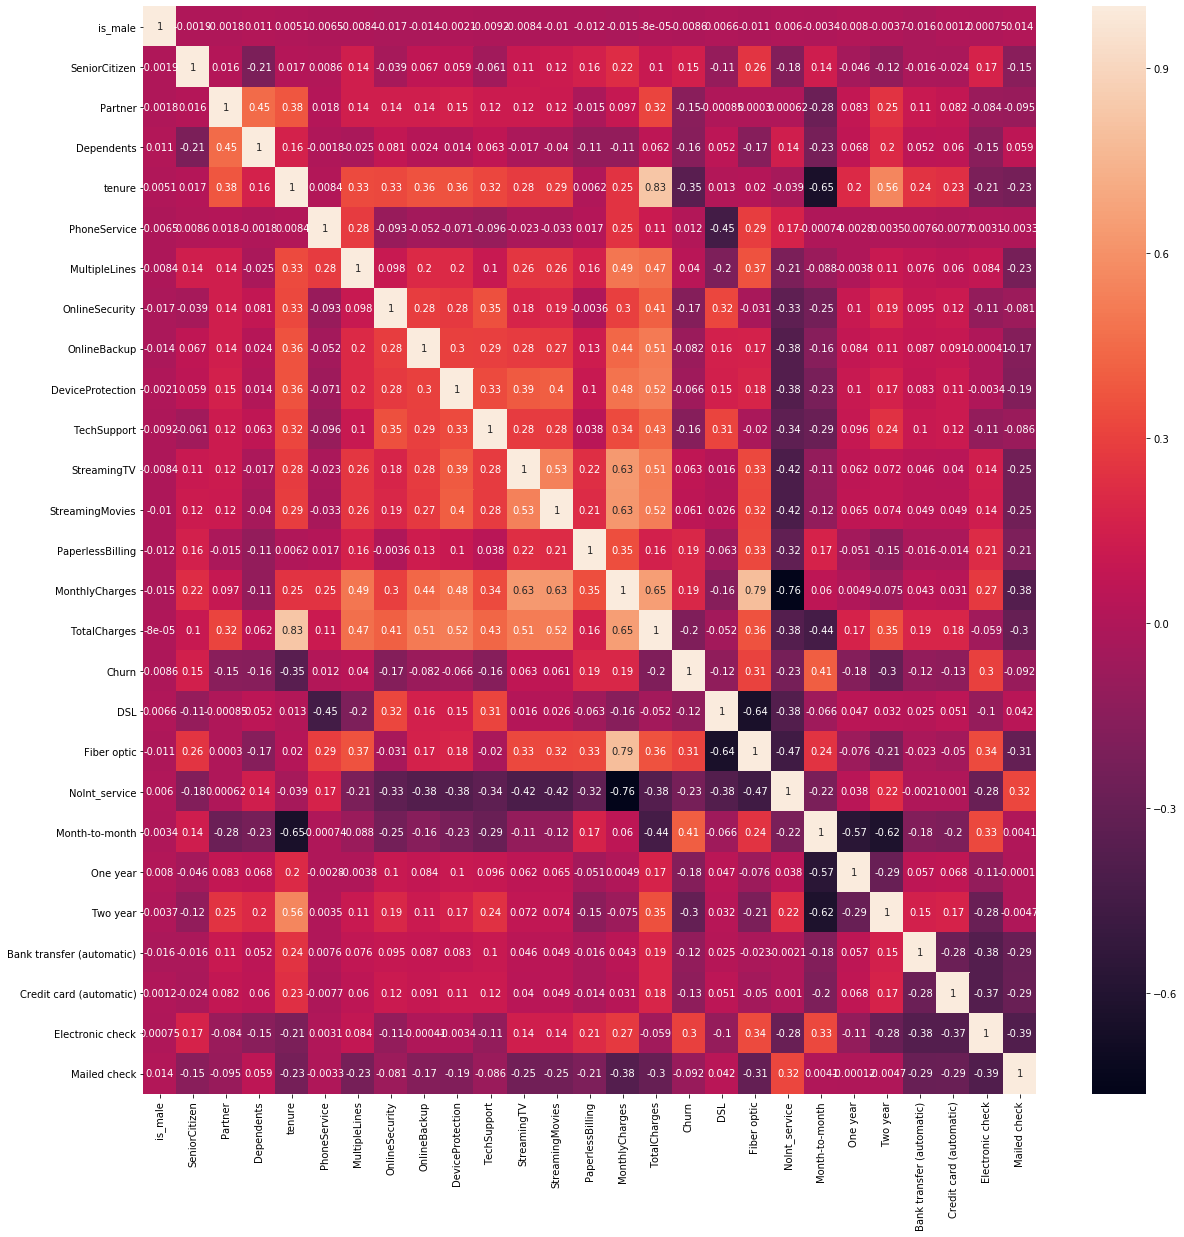

In [16]:
# Run heatmap to check for variable correlations.
df = df.drop(['customerID'], axis=1)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10})

### Checking for unbalaced data

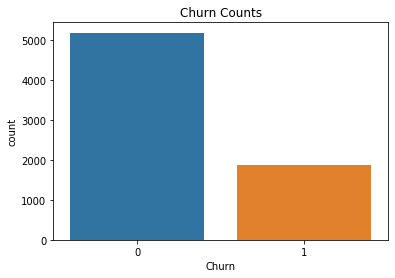

0    5174
1    1869
Name: Churn, dtype: int64

In [159]:
# View value counts.
sns.countplot('Churn', data=df)
plt.title('Churn Counts')
plt.show()
pd.value_counts(df['Churn'])

### Separating values in the target variable

In [17]:
# Create dataframe of only customers who churned.
churn_yes = df[df['Churn'] == 1]

# Create dataframe of only customers who did not churn.
churn_no = df[df['Churn'] == 0]

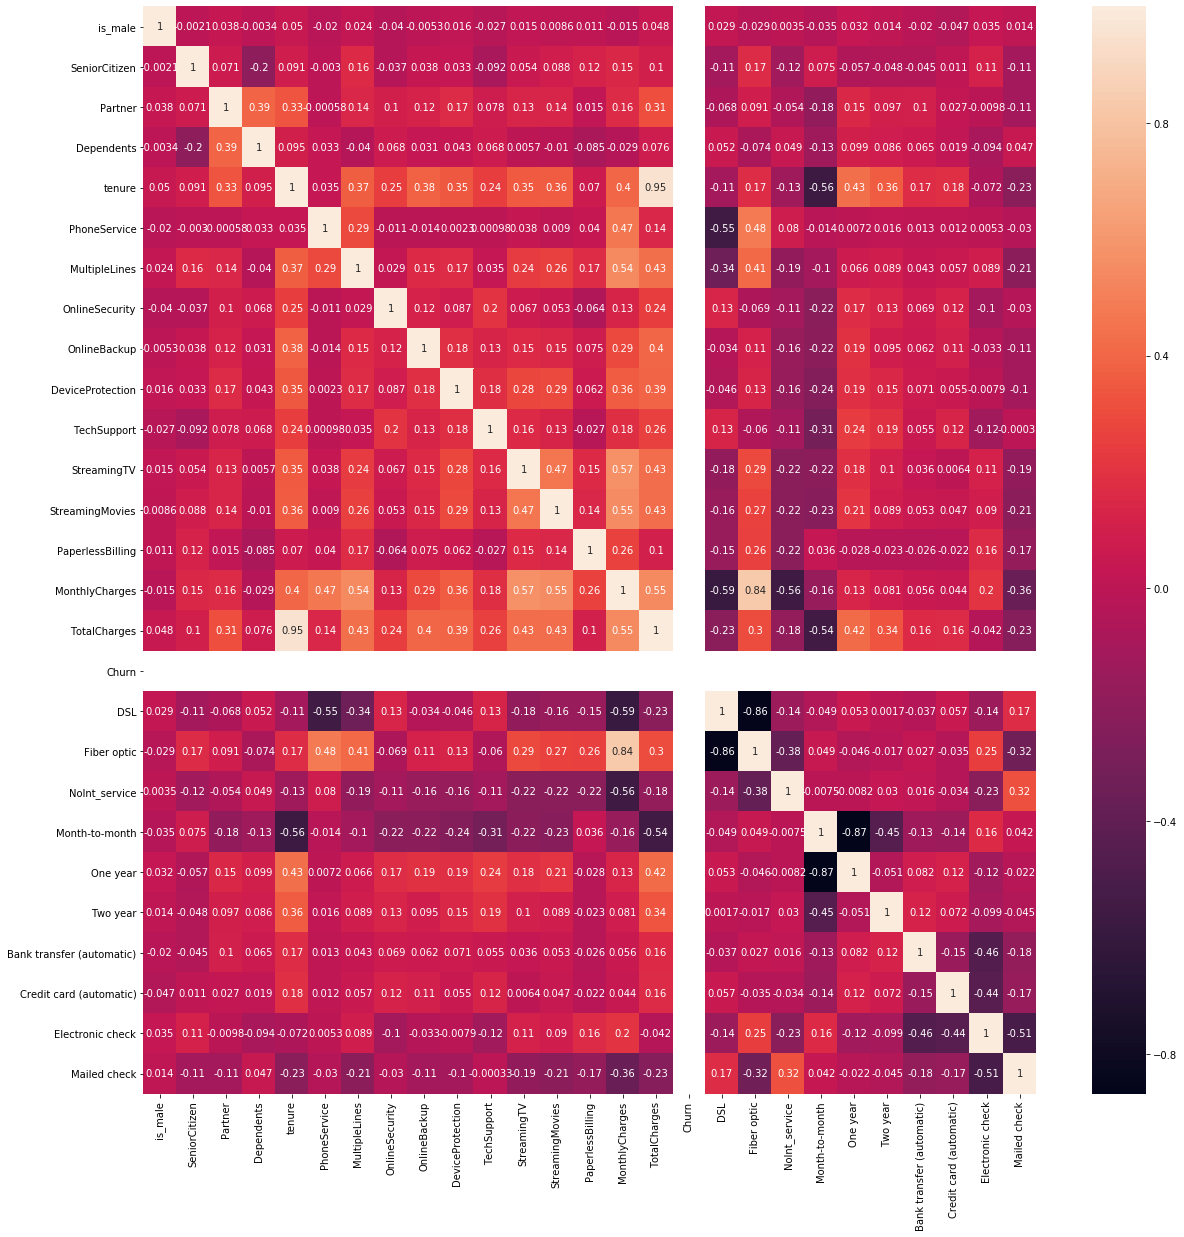

In [161]:
# Run heatmap to check for variable correlations for churn_yes.
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(churn_yes.corr(), annot=True, annot_kws={"size": 10})

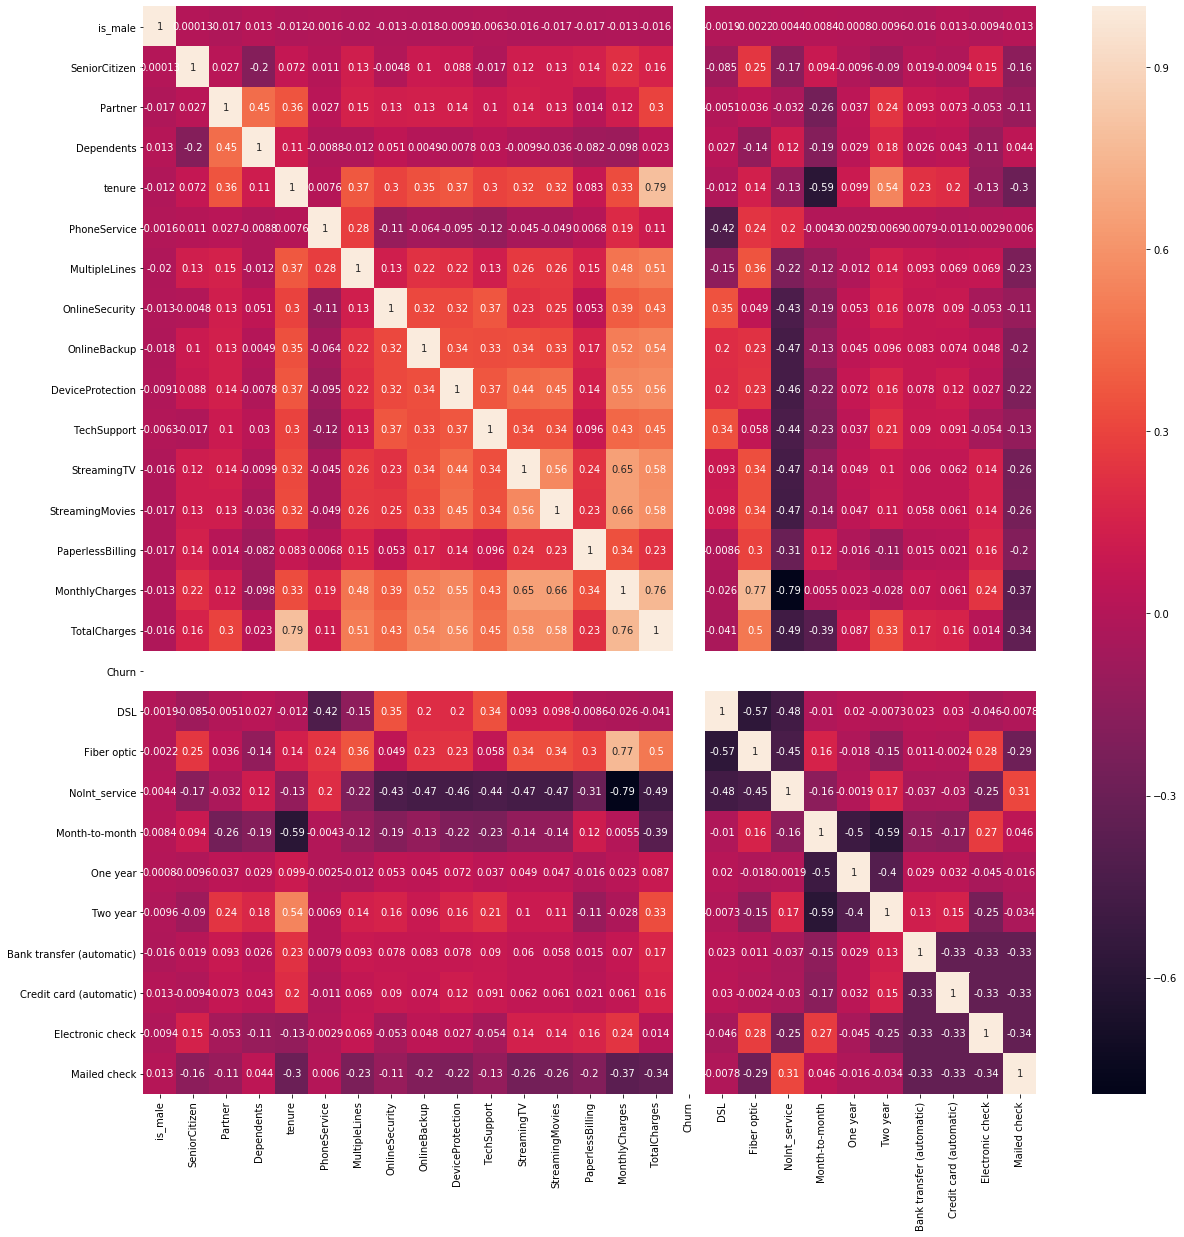

In [162]:
# Run heatmap to check for variable correlations.
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(churn_no.corr(), annot=True, annot_kws={"size": 10})

From Heatmaps above we can find highly correalred features with our target variable, Churn, and they can be the answers to the question why customers are cancelling their service. Because our main purpose is to find an appropriate model to predict as much as possible precisely, we will fit our models with features chosen by feature selection methods, Select K Best & PCA. Before that we are balancing the data because how we have seen before our target variable, Churn, is not balanced in the dataset.

### Balancing the Data

1    3500
0    3500
Name: Churn, dtype: int64

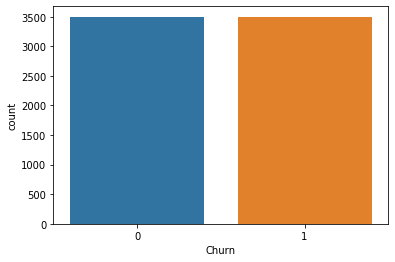

In [18]:
# Resampling the data.

# Upsample minority class.
churn_yes = resample(churn_yes,
                     replace=True,
                     n_samples=3500,
                     random_state=15)

# Downsample majority class.
churn_no = resample(churn_no,
                    replace=True,
                    n_samples=3500,
                    random_state=15)

# Combine upsampled minority class and downsampled majority class.
churn_sampled = pd.concat([churn_yes, churn_no])

# Display new class counts.
sns.countplot('Churn', data=churn_sampled)
churn_sampled.Churn.value_counts()

### Setting up input variables, target variable, and grouping training set

In [19]:
X = churn_sampled.drop('Churn', 1)
y = churn_sampled['Churn']

Now that we set up input and target variables, we will select features from them and fit the features to a series of models to find out the best model with the best performance. We will run each model two times, once with features selected by Select K Best mthod and once with feature selected by PCA method. We will keep 20% of data for test set, and we will fit the models with the 80% of data saved in the train set. We will fit the data to the models bellow:

- Naive Bayes
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Logistic Regression
- Support Vector Machines
- Gradient Boosting


### Feature selection using SelectKBest:

In [20]:
# Select top 10 features
selection = SelectKBest(score_func=f_regression, k=10) 
X_kbest = selection.fit(X, y).transform(X)

In [21]:
# Hold out 20% of data for test set
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split( X_kbest, y, test_size = 0.20, random_state = 1 )

# Naive Bayes

In [16]:
# Run Naive Bayes.
gnb = GaussianNB()
# Fit the model.
gnb.fit(X_train_kbest, y_train_kbest)
print(gnb)

GaussianNB(priors=None, var_smoothing=1e-09)


In [17]:
y_pred_gnb = gnb.predict(X_test_kbest)
# Accuracy score.
accuracy_score(y_test_kbest, y_pred_gnb)
# Cross-validation.
gnb_score = cross_val_score(gnb, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gnb_score.mean()))
# Classification report.
print(classification_report(y_test_kbest, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test_kbest, y_pred_gnb))

Cross-Validation Scores: [0.75       0.74285714 0.75       0.76142857 0.77142857 0.75571429
 0.74428571 0.74428571 0.73       0.73714286]
Averaged Cross-Validation Scores: 74.87%.
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       699
           1       0.71      0.85      0.77       701

    accuracy                           0.75      1400
   macro avg       0.76      0.75      0.75      1400
weighted avg       0.76      0.75      0.75      1400

[[460 239]
 [108 593]]


From the result of the classification report and the cross validation scores, the Naive Bayes model has an accuracy of about 75%, and it doesn't look very good. Looking at the confusion matrix, we see 239 false positive of totally 832 positive observeations, and it means more than one third of positive observations are predicted false which is not a good outcome. Looking at the classification_report results we can see where are important to us we don't have good numbers. Precision and recall for value of 1, meaning the churn accured, the values of 71% and 85% respectively, and 71% for precision is not a good result.<br>
Because there are no hyperparameters for a gaussian naive bayes model, it was not necessory to find the best parameters for example by GridSearcCV. For other models we try to tune the parameters by GridSearchCV processing.

# K-Nearest Neighbors

In [18]:
# Finding best parameters by GridSearchCV

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_kbest,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8971428571428571
{'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='distance')


In [19]:
# Build the KNN model.
knn = KNeighborsClassifier(n_neighbors=29, weights= 'distance')
# Fit the model.
knn.fit(X_train_kbest, y_train_kbest)
print(knn)
y_pred_knn = knn.predict(X_test_kbest)
# Accuracy score.
accuracy_score(y_test_kbest, y_pred_knn)
# Cross-validation.
knn_score = cross_val_score(knn, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(knn_score.mean()))
# Classification report.
print(classification_report(y_test_kbest, y_pred_knn))
# Confusion matrix.
print(confusion_matrix(y_test_kbest, y_pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='distance')
Cross-Validation Scores: [0.90714286 0.90285714 0.88571429 0.88142857 0.90428571 0.89857143
 0.90285714 0.89857143 0.89       0.9       ]
Averaged Cross-Validation Scores: 89.71%.
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       699
           1       0.87      0.93      0.90       701

    accuracy                           0.90      1400
   macro avg       0.90      0.89      0.89      1400
weighted avg       0.90      0.90      0.89      1400

[[600  99]
 [ 48 653]]


The KNN model performance overall looks good except for 99 out of 752 false positive which means about 15% from the confusion matrix. The KNN model has an accuracy of about 90%, and it looks good. Looking at the classification_report results we can see where are important to us we have the precision and recall for value of 1, meaning the churn accured, the values of 87% and 93% respectively.

# Decision Tree

In [20]:
# Finding best parameters by GridSearchCV
params = {'criterion':['gini','entropy'], 'max_features': list(range(2, 10)),
          'max_depth':[4,5,6,7,8,9,10,15,20],
          'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'random_state': [1, 5, 10, 15, 20]}
decision_tree = tree.DecisionTreeClassifier()
grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=3)

grid_search_cv.fit(X_kbest, y)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

Fitting 3 folds for each of 211680 candidates, totalling 635040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 635040 out of 635040 | elapsed: 137.9min finished


0.7937142857142857
{'criterion': 'gini', 'max_depth': 15, 'max_features': 6, 'max_leaf_nodes': 99, 'min_samples_split': 2, 'random_state': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=6, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')


In [22]:
# Build the Decision Tree model
dtc = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=6,
    max_leaf_nodes=99,
    min_samples_split=2,
    max_depth=15,
    random_state=5
)
# Fitting the model
dtc.fit(X_train_kbest, y_train_kbest)
print(dtc)
y_pred_dtc = dtc.predict(X_test_kbest)
# Accuracy score
accuracy_score(y_test_kbest, y_pred_dtc)
# Cross-validation
dtc_score = cross_val_score(dtc, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(dtc_score.mean()))
# Classification report
print(classification_report(y_test_kbest, y_pred_dtc))
# Confusion matrix
print(confusion_matrix(y_test_kbest, y_pred_dtc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=6, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')
Cross-Validation Scores: [0.79142857 0.78857143 0.79142857 0.78285714 0.79714286 0.81428571
 0.77857143 0.79285714 0.78       0.77571429]
Averaged Cross-Validation Scores: 78.93%.
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       699
           1       0.77      0.82      0.80       701

    accuracy                           0.79      1400
   macro avg       0.79      0.79      0.79      1400
weighted avg       0.79      0.79      0.79      1400

[[528 171]
 [124 577]]


The Decision Tree model has an accuracy of about 79% and high numbers of false predicted observations. The precision and recall for value of 1, meaning the churn accured, are the values of 77% and 82% respectively.

# Random Forest

In [26]:
# Finding best parameters by GridSearchCV
grid_rfc = RandomForestClassifier()
param_grid = {'criterion':['gini','entropy'], 'n_estimators': [10,20,50], 'max_depth': [4,5,6,8,10,20],
              'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'random_state': [1, 5, 10, 15]}

grid_search_cv = GridSearchCV(grid_rfc, param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_kbest, y_train_kbest)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

Fitting 3 folds for each of 42336 candidates, totalling 127008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 127008 out of 127008 | elapsed: 272.2min finished


0.8123214285714285
{'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 98, 'min_samples_split': 4, 'n_estimators': 20, 'random_state': 5}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=98,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


In [28]:
# Building the Random Forest model
rfc = RandomForestClassifier(criterion='gini', max_depth=20, max_leaf_nodes=98, min_samples_split=4, 
                             n_estimators=20, random_state=5)
# Fitting the model.
rfc.fit(X_train_kbest, y_train_kbest)
print(rfc)
y_pred_rfc = rfc.predict(X_test_kbest)
# Accuracy score
accuracy_score(y_test_kbest, y_pred_rfc)
# Cross-validation
rfc_score = cross_val_score(rfc, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(rfc_score.mean()))
# Classification report
print(classification_report(y_test_kbest, y_pred_rfc))
# Confusion matrix
print(confusion_matrix(y_test_kbest, y_pred_rfc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=98,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)
Cross-Validation Scores: [0.81571429 0.81285714 0.82285714 0.82857143 0.83285714 0.82285714
 0.81285714 0.81857143 0.80428571 0.8       ]
Averaged Cross-Validation Scores: 81.71%.
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       699
           1       0.81      0.84      0.82       701

    accuracy                           0.82      1400
   macro avg       0.82      0.82      0.82      1400
weighted avg       0.82      0.82      0.82      1400

[[559 140]

The Random Forest model has an accuracy of about 79% and high numbers of false predicted observations especially for positive values, 140 out of 729. The precision and recall for value of 1, meaning the churn accured, are the values of 81% and 84% respectively.

# Logistic Regression

In [33]:
# Finding best parameters by GridSearchCV
log_reg = LogisticRegression()
params = {'C':np.logspace(0,4,10), 'penalty':['l1','l2']}

logreg_cv = GridSearchCV(log_reg, params, cv=10)
logreg_cv.fit(X_train_kbest, y_train_kbest)

print (logreg_cv.best_score_)
print (logreg_cv.best_params_)
print (logreg_cv.best_estimator_)

0.7610714285714286
{'C': 1.0, 'penalty': 'l2'}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [36]:
# Building the Logistic Regression model
log_reg = LogisticRegression(C=1.0, penalty='l2')
# Fitting the model
log_reg.fit(X_train_kbest, y_train_kbest)
print(log_reg)
y_pred_lr = log_reg.predict(X_test_kbest)
# Accuracy score.
accuracy_score(y_test_kbest, y_pred_lr)
# Cross-validation.
lr_score = cross_val_score(log_reg, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_score.mean()))
# Classification report.
print(classification_report(y_test_kbest, y_pred_lr))
# Confusion matrix.
print(confusion_matrix(y_test_kbest, y_pred_lr))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Cross-Validation Scores: [0.76       0.74285714 0.75714286 0.77       0.79       0.76285714
 0.76428571 0.75285714 0.74857143 0.76142857]
Averaged Cross-Validation Scores: 76.10%.
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       699
           1       0.74      0.81      0.77       701

    accuracy                           0.76      1400
   macro avg       0.76      0.76      0.76      1400
weighted avg       0.76      0.76      0.76      1400

[[495 204]
 [133 568]]


The Logestic Regression model has an accuracy of about 76% and high numbers of false predicted observations. The precision and recall for value of 1, meaning the churn accured, are the values of 74% and 81% respectively.

# Support Vector Machines

In [60]:
# Finding best parameters by GridSearchCV
svc = LinearSVC()

Cs = [0.1, 1, 10, 100]
param_grid = {'C': Cs, 'max_iter' : [1000, 5000, 8000]}

grid_search_cv = GridSearchCV(svc, param_grid, cv=5)
grid_search_cv.fit(X_kbest, y)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

0.7232857142857143
{'C': 0.1, 'max_iter': 1000}
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [52]:
# Building the SVM model
svc = LinearSVC(C=0.1, max_iter=1000)
# Fitting the model
svc.fit(X_train_kbest, y_train_kbest)
print(svc)
y_pred_svc = svc.predict(X_test_kbest)
# Accuracy score
accuracy_score(y_test_kbest, y_pred_svc)
# Cross-validation
svc_score = cross_val_score(svc, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(svc_score.mean()))
# Classification score
print(classification_report(y_test_kbest, y_pred_svc))
# Confusion matrix
print(confusion_matrix(y_test_kbest, y_pred_svc))

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Cross-Validation Scores: [0.75       0.59857143 0.7        0.7        0.64142857 0.73428571
 0.60857143 0.71       0.73285714 0.64857143]
Averaged Cross-Validation Scores: 68.24%.
              precision    recall  f1-score   support

           0       0.84      0.46      0.60       699
           1       0.63      0.91      0.75       701

    accuracy                           0.69      1400
   macro avg       0.74      0.69      0.67      1400
weighted avg       0.74      0.69      0.67      1400

[[325 374]
 [ 62 639]]


The SVM model has an accuracy of about 69% and high numbers of false predicted observations. The precision and recall for value of 1, meaning the churn accured, are the values of 63% and 91% respectively.

# Gradient Boosting

In [24]:
# Finding best parameters by GridSearchCV
gbc = ensemble.GradientBoostingClassifier()

gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [1, 10, 20, 50],
              'n_estimators':[100, 250, 500]
              }

grid_search_cv = GridSearchCV(gbc, gb_grid_params, cv=5)
grid_search_cv.fit(X_train_kbest, y_train_kbest)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

0.8735714285714286
{'learning_rate': 0.05, 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 500}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [27]:
# Building the Gradient Boosting model
gbc = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth=8, min_samples_leaf=1, n_estimators=500)
# Fittin the model
gbc.fit(X_train_kbest, y_train_kbest)
print(gbc)
y_pred_gbc = gbc.predict(X_test_kbest)
# Accuracy score
accuracy_score(y_test_kbest, y_pred_gbc)
# Cross-validation
gbc_score = cross_val_score(gbc, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gbc_score.mean()))
# Classification report
print(classification_report(y_test_kbest, y_pred_gbc))
# Confusion matrix
print(confusion_matrix(y_test_kbest, y_pred_gbc))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Cross-Validation Scores: [0.92571429 0.91571429 0.89714286 0.88714286 0.91142857 0.91428571
 0.91857143 0.90285714 0.89285714 0.89      ]
Averaged Cross-Validation Scores: 90.56%.
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       699
           1       0.89      0.93 

The Gradient Boosting has the best result with minor numbers of false positive observations, 84 out of 735 which means 11% from the confusion matrix. The model has an accuracy of about 91%, and it looks good. Looking at the classification_report results we can see where are important to us we have the precision and recall for value of 1, meaning the churn accured, the values of 89% and 93% respectively.
Overall accuracy of models:<br>
Naive Bayes: 0.75<br>
K-Nearest Neighbors: 0.90<br>
Decision Tree: 0.79<br>
Random Forest: 0.82<br>
Logistic Regression: 0.76<br>
Support Vector Machines: 0.69<br>
Gradient Boosting: 0.91<br>
As we mentioned before, the Gradient Boosting model is winner with a higher precise result.
Now we run the models using PCA feature selection:

### Feature selection using PCA:

In [22]:
# Select top 5 features
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

# Hold out 20% of data for test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( X_pca, y, test_size = 0.20, random_state = 1 )

# Naive Bayes

In [31]:
# Run Naive Bayes.
gnb = GaussianNB()
# Fit the model.
gnb.fit(X_train_pca, y_train_pca)
print(gnb)
y_pred_gnb = gnb.predict(X_test_pca)
# Accuracy score.
accuracy_score(y_test_pca, y_pred_gnb)
# Cross-validation.
gnb_score = cross_val_score(gnb, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gnb_score.mean()))
# Classification report.
print(classification_report(y_test_pca, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test_pca, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
Cross-Validation Scores: [0.75285714 0.72428571 0.74285714 0.76       0.77285714 0.75142857
 0.74       0.75285714 0.73285714 0.76285714]
Averaged Cross-Validation Scores: 74.93%.
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       699
           1       0.75      0.77      0.76       701

    accuracy                           0.76      1400
   macro avg       0.76      0.76      0.76      1400
weighted avg       0.76      0.76      0.76      1400

[[520 179]
 [159 542]]


The Naive Bayes model featuring with PCA almost has the same results with a lightly getting better in accuracy from 75% to 75%, but the false positive is almost 25%.   

# K-Nearest Neighbors

In [33]:
# Finding best parameters by GridSearchCV

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train_pca,y_train_pca)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8798214285714285
{'n_neighbors': 30, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='distance')


In [34]:
# Build the KNN model.
knn = KNeighborsClassifier(n_neighbors=30, weights= 'distance')
# Fit the model.
knn.fit(X_train_pca, y_train_pca)
print(knn)
y_pred_knn = knn.predict(X_test_pca)
# Accuracy score.
accuracy_score(y_test_pca, y_pred_knn)
# Cross-validation.
knn_score = cross_val_score(knn, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(knn_score.mean()))
# Classification report.
print(classification_report(y_test_pca, y_pred_knn))
# Confusion matrix.
print(confusion_matrix(y_test_pca, y_pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='distance')
Cross-Validation Scores: [0.91       0.90571429 0.88285714 0.88571429 0.90142857 0.89714286
 0.91428571 0.89714286 0.88714286 0.90428571]
Averaged Cross-Validation Scores: 89.86%.
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       699
           1       0.87      0.94      0.91       701

    accuracy                           0.90      1400
   macro avg       0.90      0.90      0.90      1400
weighted avg       0.90      0.90      0.90      1400

[[603  96]
 [ 42 659]]


The KNN model with PCA featuring has the same accuracy, 90%, and the percentage of false positive observation got better. 

# Decision Tree

In [36]:
# Finding best parameters by GridSearchCV
params = {'criterion':['gini','entropy'], 'max_features': list(range(5, 7)),
          'max_depth':[5,10,15],
          'max_leaf_nodes': list(range(90, 101)), 'min_samples_split': [0.5, 2], 'random_state': [0, 5, 10]}
decision_tree = tree.DecisionTreeClassifier()
grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=3)

grid_search_cv.fit(X_train_pca, y_train_pca)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7998214285714286
{'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'max_leaf_nodes': 90, 'min_samples_split': 2, 'random_state': 0}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=5, max_leaf_nodes=90,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


[Parallel(n_jobs=1)]: Done 2376 out of 2376 | elapsed:  1.0min finished


In [38]:
# Build the Decision Tree model
dtc = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=5,
    max_leaf_nodes=90,
    min_samples_split=2,
    max_depth=10
)
# Fitting the model
dtc.fit(X_train_pca, y_train_pca)
print(dtc)
y_pred_dtc = dtc.predict(X_test_pca)
# Accuracy score
accuracy_score(y_test_pca, y_pred_dtc)
# Cross-validation
dtc_score = cross_val_score(dtc, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(dtc_score.mean()))
# Classification report
print(classification_report(y_test_pca, y_pred_dtc))
# Confusion matrix
print(confusion_matrix(y_test_pca, y_pred_dtc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=5, max_leaf_nodes=90,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Cross-Validation Scores: [0.78714286 0.80285714 0.79857143 0.78285714 0.81857143 0.80142857
 0.79857143 0.78285714 0.79285714 0.79285714]
Averaged Cross-Validation Scores: 79.59%.
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       699
           1       0.78      0.80      0.79       701

    accuracy                           0.79      1400
   macro avg       0.79      0.79      0.79      1400
weighted avg       0.79      0.79      0.79      1400

[[542 157]
 [141 560]]


The Decision Tree model with PCA featuring has the same accuracy, 79%, and a better percentage of false positive observations.

# Random Forest

In [39]:
# Finding best parameters by GridSearchCV
grid_rfc = RandomForestClassifier()
param_grid = {'criterion':['gini','entropy'], 'n_estimators': [10,20], 'max_depth': [5,10,20],
              'max_leaf_nodes': list(range(90, 101)), 'min_samples_split': [2, 3, 4], 'random_state': [0, 5]}

grid_search_cv = GridSearchCV(grid_rfc, param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_pca, y_train_pca)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2376 out of 2376 | elapsed:  8.9min finished


0.8226785714285715
{'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 99, 'min_samples_split': 4, 'n_estimators': 20, 'random_state': 0}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [40]:
# Building the Random Forest model
rfc = RandomForestClassifier(criterion='gini', max_depth=20, max_leaf_nodes=99, min_samples_split=4, n_estimators=20)
# Fitting the model.
rfc.fit(X_train_pca, y_train_pca)
print(rfc)
y_pred_rfc = rfc.predict(X_test_pca)
# Accuracy score
accuracy_score(y_test_pca, y_pred_rfc)
# Cross-validation
rfc_score = cross_val_score(rfc, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(rfc_score.mean()))
# Classification report
print(classification_report(y_test_pca, y_pred_rfc))
# Confusion matrix
print(confusion_matrix(y_test_pca, y_pred_rfc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Cross-Validation Scores: [0.83142857 0.82285714 0.83142857 0.83285714 0.85857143 0.81571429
 0.84285714 0.85857143 0.82142857 0.80428571]
Averaged Cross-Validation Scores: 83.20%.
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       699
           1       0.82      0.84      0.83       701

    accuracy                           0.83      1400
   macro avg       0.83      0.83      0.83      1400
weighted avg       0.83      0.83      0.83      1400

[[568 1

The Random Forest model with PCA featuring has a better accuracy of 83%, and also the percentage of false positive observation got better. 

# Logistic Regression

In [42]:
# Finding best parameters by GridSearchCV
log_reg = LogisticRegression()
params = {'C':np.logspace(0,4,10), 'penalty':['l1','l2']}

logreg_cv = GridSearchCV(log_reg, params, cv=10)
logreg_cv.fit(X_train_pca, y_train_pca)

print (logreg_cv.best_score_)
print (logreg_cv.best_params_)
print (logreg_cv.best_estimator_)

0.7660714285714286
{'C': 21.544346900318832, 'penalty': 'l2'}
LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [44]:
# Building the Logistic Regression model
log_reg = LogisticRegression(C=21.54, penalty='l2')
# Fitting the model
log_reg.fit(X_train_pca, y_train_pca)
print(log_reg)
y_pred_lr = log_reg.predict(X_test_pca)
# Accuracy score.
accuracy_score(y_test_pca, y_pred_lr)
# Cross-validation.
lr_score = cross_val_score(log_reg, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_score.mean()))
# Classification report.
print(classification_report(y_test_pca, y_pred_lr))
# Confusion matrix.
print(confusion_matrix(y_test_pca, y_pred_lr))

LogisticRegression(C=21.54, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Cross-Validation Scores: [0.77857143 0.75142857 0.76142857 0.77714286 0.80285714 0.77142857
 0.75428571 0.76571429 0.75857143 0.73714286]
Averaged Cross-Validation Scores: 76.59%.
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       699
           1       0.76      0.78      0.77       701

    accuracy                           0.77      1400
   macro avg       0.77      0.77      0.77      1400
weighted avg       0.77      0.77      0.77      1400

[[527 172]
 [154 547]]


The Logistic Regression with PCA featuring has a better accuracy of 77%, and the percentage of false positive observation got better from 35% to 24%.

# Support Vector Machines

In [47]:
# Finding best parameters by GridSearchCV
svc = LinearSVC()

Cs = [0.1, 1, 10]
param_grid = {'C': Cs, 'max_iter' : [1000, 8000]}

grid_search_cv = GridSearchCV(svc, param_grid, cv=5)
grid_search_cv.fit(X_train_pca, y_train_pca)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

0.6858928571428572
{'C': 1, 'max_iter': 8000}
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=8000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [48]:
# Building the SVM model
svc = LinearSVC(max_iter=8000)
# Fitting the model
svc.fit(X_train_pca, y_train_pca)
print(svc)
y_pred_svc = svc.predict(X_test_pca)
# Accuracy score
accuracy_score(y_test_pca, y_pred_svc)
# Cross-validation
svc_score = cross_val_score(svc, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(svc_score.mean()))
# Classification score
print(classification_report(y_test_pca, y_pred_svc))
# Confusion matrix
print(confusion_matrix(y_test_pca, y_pred_svc))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=8000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Cross-Validation Scores: [0.77428571 0.70428571 0.58714286 0.65428571 0.73428571 0.72714286
 0.61857143 0.71285714 0.63571429 0.60285714]
Averaged Cross-Validation Scores: 67.51%.
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       699
           1       0.62      0.61      0.61       701

    accuracy                           0.62      1400
   macro avg       0.62      0.62      0.62      1400
weighted avg       0.62      0.62      0.62      1400

[[437 262]
 [275 426]]


The overall performance for SVM model got worse with the PCA featuring. Its accuracy changes from 69% to 62%, and aslo the percentage of false positive got worse. It is of note that the outcome of gridsearch result was very different, and the big difference between these to featurings might be because of that. Because this model is not approaching to the winner model, we stop hear. Otherwise we could try it with same parameters as before and run few times the GridSearchCV processing.

# Gradient Boosting

In [49]:
# Finding best parameters by GridSearchCV
gbc = ensemble.GradientBoostingClassifier()

gb_grid_params = {'learning_rate': [0.1, 0.05],
              'max_depth': [6, 8],
              'min_samples_leaf': [1, 10],
              'n_estimators':[250, 500]
              }

grid_search_cv = GridSearchCV(gbc, gb_grid_params, cv=5)
grid_search_cv.fit(X_train_pca, y_train_pca)

print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

0.8857142857142857
{'learning_rate': 0.05, 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 500}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [25]:
# Building the Gradient Boosting model
gbc = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth=8, min_samples_leaf=1, n_estimators = 500)
# Fittin the model
gbc.fit(X_train_pca, y_train_pca)
print(gbc)
y_pred_gbc = gbc.predict(X_test_pca)
# Accuracy score
accuracy_score(y_test_pca, y_pred_gbc)
# Cross-validation
gbc_score = cross_val_score(gbc, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gbc_score.mean()))
# Classification report
print(classification_report(y_test_pca, y_pred_gbc))
# Confusion matrix
print(confusion_matrix(y_test_pca, y_pred_gbc))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Cross-Validation Scores: [0.91571429 0.92       0.90142857 0.90571429 0.92       0.92285714
 0.93       0.91142857 0.91285714 0.90857143]
Averaged Cross-Validation Scores: 91.49%.
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       699
           1       0.89      0.92 

And this time also the Gradient Boosting has the best result with minor numbers of false positive observations, 76 out of 723 which means 11% from the confusion matrix. The model has an accuracy of about 91%, and it looks good. Looking at the classification_report results we can see where are important to us we have the precision and recall for value of 1, meaning the churn accured, the values of 89% and 92% respectively.
For a totally comarison of the models with two types of featuring we can see the table bellow:

|                       | Accuracy - PCA Feacturing | Accuracy - Select Best K Featuring Feacturing |
|-----------------------|---------------------------|-----------------------------------------------|
|Naive Bayes            | 0.76                      | 0.75                                          |
|                       |                           |                                               |
|K-Nearest Neighbors    | 0.90                      | 0.90                                          |
|                       |                           |                                               |
|Decision Tree          | 0.79                      | 0.79                                          |
|                       |                           |                                               |
|Random Forest          | 0.83                      | 0.82                                          |
|                       |                           |                                               |
|Logistic Regression    | 0.77                      | 0.76                                          |
|                       |                           |                                               |
|Support Vector Machines| 0.62                      | 0.69                                          |
|                       |                           |                                               |
|Gradient Boosting      | 0.91                      | 0.91                                          |


There is no dubt that the Gradient Boosting is the winner model, and because in the most outcoms there were better results about false positives with the PCA featuring, we choose the Gradient Boosting model using PCA featuring.<br> 
Now we might be able to take better results with testing different numbers of components for the PCA featuring and running our model with other parameters. 